In [1]:
#!/usr/bin/env python

# This script aims to reconstruct features for a event,
# our method is to choose the candidate with highest score.
# The command-line parameters are:
# input_file_name, output_file_name, key

# data processing packages
import sys
import numpy as np
import pandas as pd
from pandas import DataFrame

# plot packages
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import cm
import seaborn as sns
%matplotlib inline

# evaluation packages
from sklearn.metrics import roc_auc_score

# obtain dataset
input_file_name = './data/fullevent_test.hdf'
key = 'signal'
event = pd.read_hdf(input_file_name, key)

# hypothesis sets
upsmcmass_list = [1., 2., 3., 4., 5., 6., 7., 8., 9., 10.]
Amcmass_list = [0.1, 0.2, 0.5, 0.75, 1.0, 2.0]
mcmass_list = [[upsmcmass, Amcmass] for upsmcmass in upsmcmass_list for Amcmass in Amcmass_list if upsmcmass>3*Amcmass]

In [12]:
"""
signal = pd.read_hdf('./data/fullsignal_test.hdf', key)
filt = (signal.upsmcmass < upsmcmass + delta_upsmcmass) & \
    (signal.upsmcmass > upsmcmass - delta_upsmcmass) & \
    (signal.A1mcmass < Amcmass + delta_Amcmass) & \
    (signal.A1mcmass > Amcmass - delta_Amcmass)
signal_singleMC = signal[filt]
"""

('AUC score is:', 0.93047288146754736)
('acceptance is:', 0.6135316296606619)
('selection efficiency is:', 0.8569477637418914)


(array([  6.78807947e+01,   1.10375276e-01,   1.47167035e-01,
          7.35835173e-02,   7.35835173e-02,   7.35835173e-02,
          3.31125828e-01,   2.20750552e-01,   2.57542311e-01,
          7.35835173e-02,   2.57542311e-01,   1.47167035e-01,
          2.94334069e-01,   2.57542311e-01,   5.88668138e-01,
          2.57542311e-01,   2.20750552e-01,   1.83958793e-01,
          2.94334069e-01,   1.83958793e-01,   3.67917586e-01,
          3.67917586e-01,   3.31125828e-01,   3.31125828e-01,
          4.04709345e-01,   2.20750552e-01,   1.10375276e-01,
          3.31125828e-01,   1.83958793e-01,   1.47167035e-01,
          2.20750552e-01,   2.20750552e-01,   2.94334069e-01,
          3.67917586e-01,   1.47167035e-01,   2.20750552e-01,
          2.20750552e-01,   2.94334069e-01,   2.94334069e-01,
          1.47167035e-01,   2.20750552e-01,   3.67917586e-02,
          2.20750552e-01,   1.83958793e-01,   1.10375276e-01,
          1.83958793e-01,   1.83958793e-01,   1.47167035e-01,
        

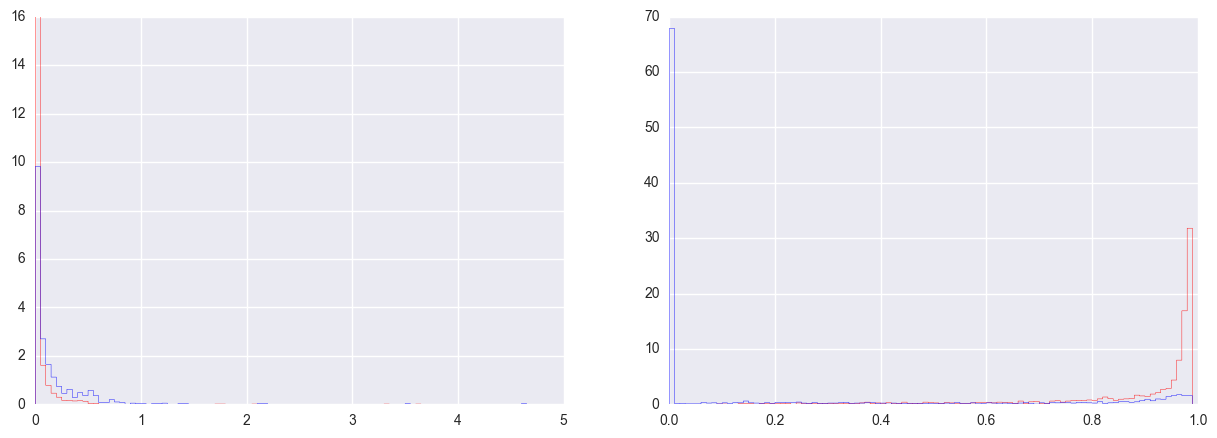

In [9]:
delta_upsmcmass = 0.01
delta_Amcmass = 0.01
threshold = 0.5
upsmcmass = 10.0
Amcmass = 1.0
filt = (event.upsmcmass < upsmcmass + delta_upsmcmass) & \
    (event.upsmcmass > upsmcmass - delta_upsmcmass) & \
    (event.A1mcmass < Amcmass + delta_Amcmass) & \
    (event.A1mcmass > Amcmass - delta_Amcmass)
event_singleMC = event[filt]
event_singleMC_pass_threshold = event_singleMC[event_singleMC.cr_score > threshold]

print('AUC score is:',roc_auc_score(event_singleMC.truth_matching.values.astype('float'), event_singleMC.cr_score.values))
print('acceptance is:', event_singleMC.dropna().shape[0] * 1.0 / event_singleMC.shape[0])
print('selection efficiency is:', event_singleMC[event_singleMC.cr_score>threshold].shape[0] * 1.0 / event_singleMC.dropna().shape[0])
fig_1 = plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(event_singleMC[event_singleMC.truth_matching==1].massdiff, bins=100, histtype='step', normed=True, color='r', range=[0,5])
plt.hist(event_singleMC[event_singleMC.truth_matching==False].massdiff.dropna().values, bins=100, histtype='step', normed=True, color='b', range=[0,5])

plt.subplot(1,2,2)
plt.hist(event_singleMC[event_singleMC.truth_matching==1].cr_score, bins=100, histtype='step', normed=True, color='r', range=[0,1])
plt.hist(event_singleMC[event_singleMC.truth_matching==False].cr_score.dropna().values, bins=100, histtype='step', normed=True, color='b', range=[0,1])

('AUC score is:', 0.98113100494283279)

('generated number is:', 4750)
('acceptance number is:', 967)
('acceptance is:', 0.20357894736842105)
('selection efficiency is:', 0.6039296794208894)


(array([  8.70144794e+01,   1.83865778e-01,   4.13698000e-01,
          3.90714778e-01,   3.67731556e-01,   4.82647667e-01,
          4.13698000e-01,   2.52815445e-01,   2.75798667e-01,
          2.98781889e-01,   2.98781889e-01,   4.13698000e-01,
          3.21765111e-01,   2.98781889e-01,   2.29832222e-01,
          2.29832222e-01,   1.37899333e-01,   2.52815445e-01,
          1.83865778e-01,   2.75798667e-01,   9.19328890e-02,
          6.89496667e-02,   2.06849000e-01,   2.06849000e-01,
          2.29832222e-01,   6.89496667e-02,   9.19328890e-02,
          4.59664445e-02,   1.14916111e-01,   4.59664445e-02,
          9.19328890e-02,   2.29832222e-02,   9.19328890e-02,
          4.59664445e-02,   9.19328890e-02,   2.29832222e-02,
          1.37899333e-01,   4.59664445e-02,   6.89496667e-02,
          1.14916111e-01,   0.00000000e+00,   9.19328890e-02,
          4.59664445e-02,   2.29832222e-02,   4.59664445e-02,
          4.59664445e-02,   9.19328890e-02,   4.59664445e-02,
        

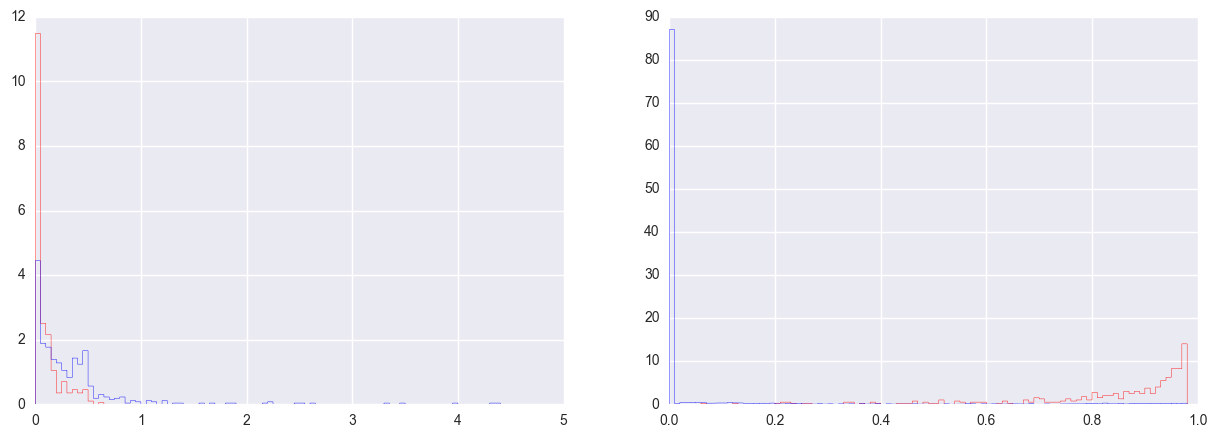

In [10]:
delta_upsmcmass = 0.05
delta_Amcmass = 0.05
threshold = 0.5
upsmcmass = 10.0
Amcmass = 2.0
filt = (event.upsmcmass < upsmcmass + delta_upsmcmass) & \
    (event.upsmcmass > upsmcmass - delta_upsmcmass) & \
    (event.A1mcmass < Amcmass + delta_Amcmass) & \
    (event.A1mcmass > Amcmass - delta_Amcmass)
event_singleMC = event[filt]

print('AUC score is:',roc_auc_score(event_singleMC.truth_matching.values.astype('float'), event_singleMC.cr_score.values))
print 
print('generated number is:',event_singleMC.shape[0])
print('acceptance number is:', event_singleMC.dropna().shape[0])
print('acceptance is:', event_singleMC.dropna().shape[0] * 1.0 / event_singleMC.shape[0])
print('selection efficiency is:', event_singleMC[event_singleMC.cr_score>threshold].shape[0] * 1.0 / event_singleMC.dropna().shape[0])

fig_2 = plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(event_singleMC[event_singleMC.truth_matching==1].massdiff, bins=100, histtype='step', normed=True, color='r', range=[0,5])
plt.hist(event_singleMC[event_singleMC.truth_matching==False].massdiff.dropna().values, bins=100, histtype='step', normed=True, color='b', range=[0,5])

plt.subplot(1,2,2)
plt.hist(event_singleMC[event_singleMC.truth_matching==1].cr_score, bins=100, histtype='step', normed=True, color='r', range=[0,1])
plt.hist(event_singleMC[event_singleMC.truth_matching==False].cr_score.dropna().values, bins=100, histtype='step', normed=True, color='b', range=[0,1])

In [4]:
# functions for model evaluation
def evaluate(upsmcmass, Amcmass, threshold=0.05, delta_upsmcmass=0.05, delta_Amcmass=0.05):
    filt = (event.upsmcmass < upsmcmass + delta_upsmcmass) & \
        (event.upsmcmass > upsmcmass - delta_upsmcmass) & \
        (event.A1mcmass < Amcmass + delta_Amcmass) & \
        (event.A1mcmass > Amcmass - delta_Amcmass)
    event_singleMC = event[filt]
    event_without_na = event_singleMC.dropna()
    event_singleMC_pass_threshold = event_singleMC[event_singleMC.cr_score > threshold]

    # return efficiency, purity, selection_efficiency and acceptance
    efficiency = event_singleMC_pass_threshold.shape[0] * 1.0 / event_singleMC.shape[0]
    purity = sum(event_singleMC_pass_threshold.truth_matching==1) * 1.0 / event_singleMC_pass_threshold.shape[0]
    selection_efficiency = event_singleMC_pass_threshold.shape[0] * 1.0 / event_without_na.shape[0]
    acceptance = event_without_na.shape[0] * 1.0 / event_singleMC.shape[0]
    return efficiency, purity, selection_efficiency, acceptance

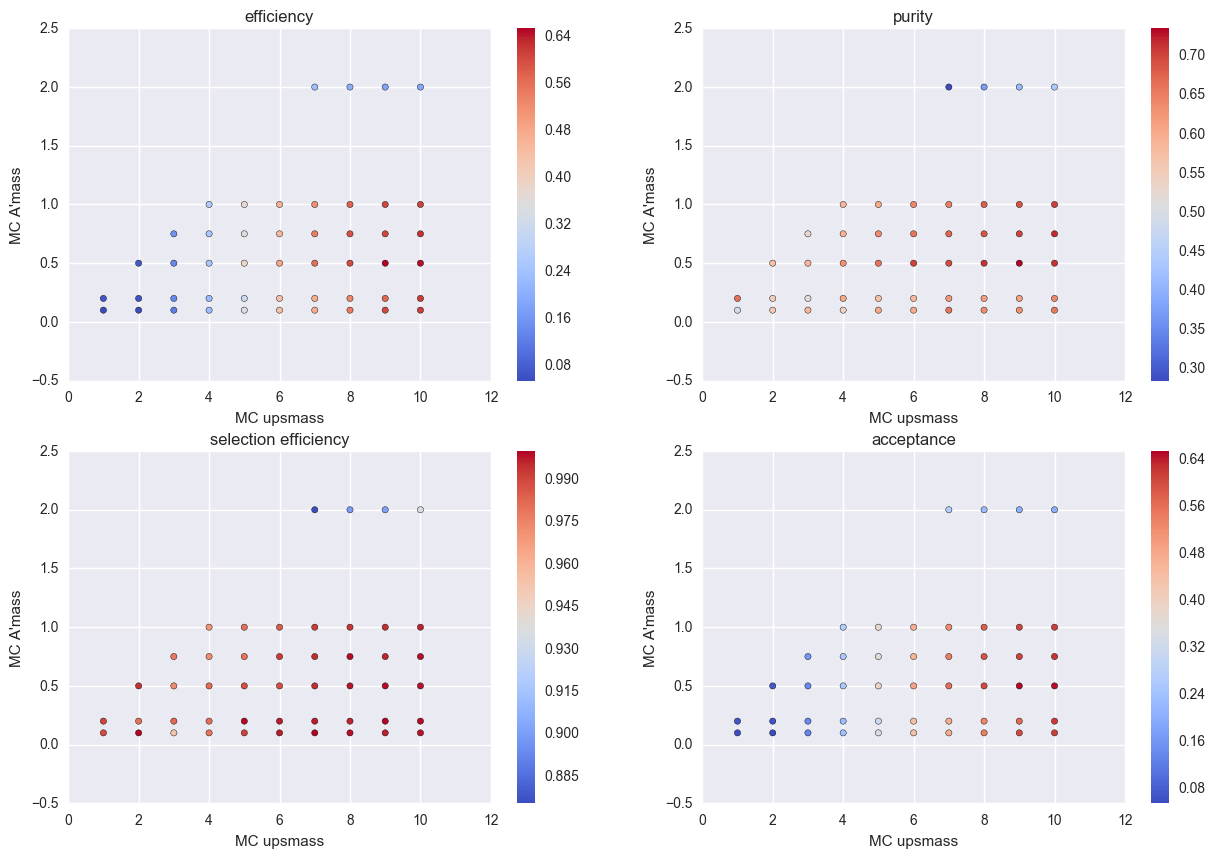

In [5]:
efficiency_list = []
purity_list = []
selection_efficiency_list = []
acceptance_list = []
for upsmcmass_, Amcmass_ in mcmass_list:
    efficiency, purity, selection_efficiency, acceptance = evaluate(upsmcmass_, Amcmass_)
    
    efficiency_list.append(efficiency)
    purity_list.append(purity)
    selection_efficiency_list.append(selection_efficiency)
    acceptance_list.append(acceptance)

fig1 = plt.figure(figsize=(15,10))
mcmass_np = np.array(mcmass_list)

plt.subplot(2,2,1)
plt.scatter(mcmass_np[:,0], mcmass_np[:,1], c=efficiency_list, cmap=cm.coolwarm)
plt.colorbar()
plt.xlabel('MC upsmass')
plt.ylabel('MC A\'mass')
plt.title('efficiency')

plt.subplot(2,2,2)
plt.scatter(mcmass_np[:,0], mcmass_np[:,1], c=purity_list, cmap=cm.coolwarm)
plt.colorbar()
plt.xlabel('MC upsmass')
plt.ylabel('MC A\'mass')
plt.title('purity')

plt.subplot(2,2,3)
plt.scatter(mcmass_np[:,0], mcmass_np[:,1], c=selection_efficiency_list, cmap=cm.coolwarm)
plt.colorbar()
plt.xlabel('MC upsmass')
plt.ylabel('MC A\'mass')
plt.title('selection efficiency')

plt.subplot(2,2,4)
plt.scatter(mcmass_np[:,0], mcmass_np[:,1], c=acceptance_list, cmap=cm.coolwarm)
plt.colorbar()
plt.xlabel('MC upsmass')
plt.ylabel('MC A\'mass')
plt.title('acceptance')

In [6]:
print evaluate(10,1)
print evaluate(10,2)
print 'purity difference is %s' % (evaluate(10,1)[1] - evaluate(10,2)[1])
print 
print evaluate(10,0.2)
print evaluate(10,0.5)
print 'purity difference is %s' % (evaluate(10,0.5)[1] - evaluate(10,0.2)[1])

(0.5871386677838291, 0.72779165180164107, 0.9569819050870604, 0.6135316296606619)
(0.15010526315789474, 0.5568022440392707, 0.7373319544984488, 0.20357894736842105)
purity difference is 0.170989407762

(0.6065270935960592, 0.64873096446700507, 0.9820538384845464, 0.6176108374384236)
(0.633799874660539, 0.72775214238628871, 0.975876487616597, 0.6494673072905787)
purity difference is 0.0790211779193


In [5]:
delta_upsmcmass = 0.1
delta_Amcmass = 0.1
threshold = 0.5
# MC specific parameters
upsmcmass = 10.
Amcmass = 1.
filt = (event.upsmcmass < upsmcmass + delta_upsmcmass) & \
        (event.upsmcmass > upsmcmass - delta_upsmcmass) & \
        (event.A1mcmass < Amcmass + delta_Amcmass) & \
        (event.A1mcmass > Amcmass - delta_Amcmass)
event_singleMC = event[filt]
event_without_na = event_singleMC.dropna()
event_singleMC_pass_threshold = event_singleMC[event_singleMC.cr_score > threshold]

# return efficiency, purity, selection_efficiency and acceptance
efficiency = event_singleMC_pass_threshold.shape[0] * 1.0 / event_singleMC.shape[0]
purity = sum(event_singleMC_pass_threshold.truth_matching==1) * 1.0 / event_singleMC_pass_threshold.shape[0]
selection_efficiency = event_singleMC_pass_threshold.shape[0] * 1.0 / event_without_na.shape[0]
acceptance = event_without_na.shape[0] * 1.0 / event_singleMC.shape[0]
print efficiency, purity, selection_efficiency, acceptance

0.525764558023 0.769721115538 0.856947763742 0.613531629661


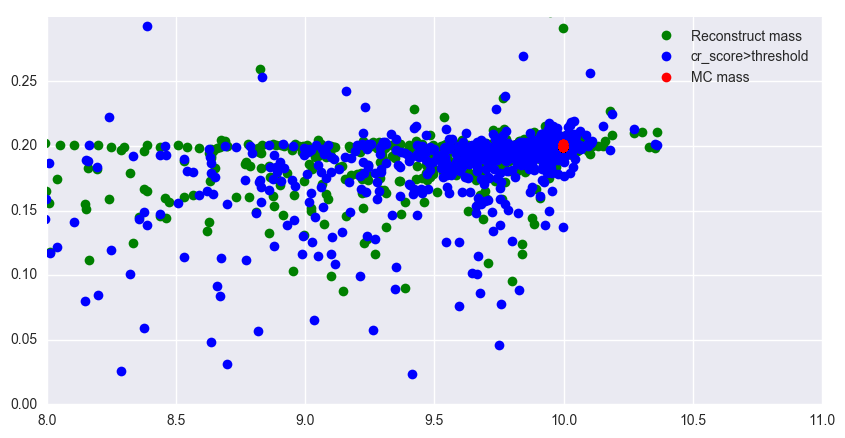

In [6]:
fig1 = plt.figure(figsize=(10,5))
ax1 = fig1.add_subplot(111)
plt.plot(event_singleMC.upsmass, event_singleMC.A2mass, 'o', color='g', label='Reconstruct mass')
#plt.plot(signal_singleMC.upsmass, signal_singleMC.A2mass, 'o', color='g', label='Reconstruct mass')
plt.plot(event_singleMC_pass_threshold.upsmass, event_singleMC_pass_threshold.A1mass,
         'o', color='b', label='cr_score>threshold')
plt.plot(event_singleMC.upsmcmass, event_singleMC.A1mcmass, 'o', color='r', label='MC mass')
plt.xlim([8,11])
plt.ylim([0.0,0.3])
plt.legend()